In [1]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

file_path = '/content/sample_data/amazon_reviews.csv'
data = pd.read_csv(file_path)
data = data.dropna(subset=['reviewText']).reset_index(drop=True)

def map_sentiment(rating):
    if rating >= 4:
        return "Positive"
    elif rating == 3:
        return "Neutral"
    else:
        return "Negative"

data['sentiment'] = data['overall'].apply(map_sentiment)

def preprocess_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = text.lower()
    stop_words = set(stopwords.words('english'))
    text = ' '.join(word for word in text.split() if word not in stop_words)
    lemmatizer = WordNetLemmatizer()
    text = ' '.join(lemmatizer.lemmatize(word) for word in text.split())
    return text

data['cleaned_review'] = data['reviewText'].apply(preprocess_text)

X = data['cleaned_review']
y = data['sentiment']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

tokenizer = Tokenizer(num_words=10000, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

max_sequence_length = 100
X_train_padded = pad_sequences(X_train_seq, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_seq, maxlen=max_sequence_length, padding='post')



In [9]:
pip install wordcloud

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 547.9/547.9 kB 8.0 MB/s eta 0:00:00


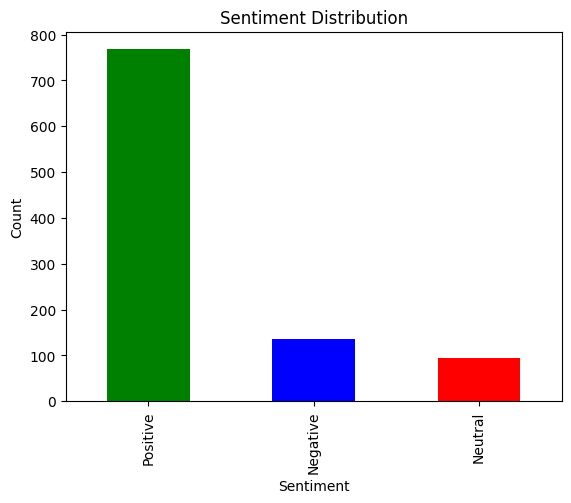

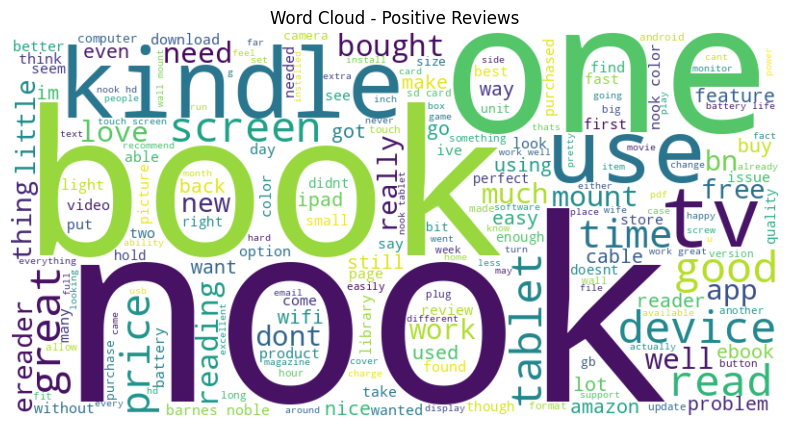

In [10]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Sentiment distribution
data['sentiment'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'])
plt.title('Sentiment Distribution')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Word Cloud for Positive reviews
positive_reviews = ' '.join(data[data['sentiment'] == 'Positive']['cleaned_review'])
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(positive_reviews)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud - Positive Reviews')
plt.show()


In [5]:
import tensorflow as tf
model = Sequential([
    Embedding(input_dim=10000, output_dim=128, input_length=max_sequence_length),
    LSTM(128, return_sequences=True),
    Dropout(0.2),
    LSTM(64),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(3, activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

sentiment_mapping = {'Positive': 0, 'Neutral': 1, 'Negative': 2}
y_train_mapped = y_train.map(sentiment_mapping).values
y_test_mapped = y_test.map(sentiment_mapping).values
tf.config.experimental.set_visible_devices([], 'GPU')
model.fit(X_train_padded, y_train_mapped, validation_data=(X_test_padded, y_test_mapped), epochs=5, batch_size=32)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 11s 280ms/step - accuracy: 0.6926 - loss: 0.8779 - val_accuracy: 0.7700 - val_loss: 0.6974
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 198ms/step - accuracy: 0.7721 - loss: 0.6927 - val_accuracy: 0.7700 - val_loss: 0.6917
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 6s 245ms/step - accuracy: 0.7601 - loss: 0.7154 - val_accuracy: 0.7700 - val_loss: 0.6883
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 190ms/step - accuracy: 0.7665 - loss: 0.7064 - val_accuracy: 0.7700 - val_loss: 0.6843
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 4s 180ms/step - accuracy: 0.7680 - loss: 0.6880 - val_accuracy: 0.7100 - val_loss: 0.7232


In [6]:

loss, accuracy = model.evaluate(X_test_padded, y_test_mapped)
print(f"Test Loss: {loss}")
print(f"Test Accuracy: {accuracy}")

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.7000 - loss: 0.7181
Test Loss: 0.723237156867981
Test Accuracy: 0.7099999785423279


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


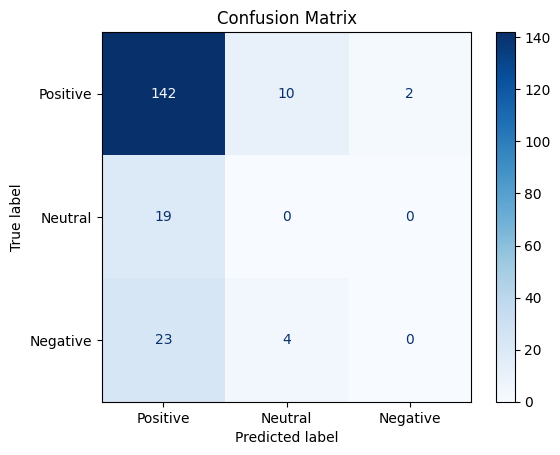

Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 214ms/step - accuracy: 0.8022 - loss: 0.6135 - val_accuracy: 0.7450 - val_loss: 0.7114
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 191ms/step - accuracy: 0.8245 - loss: 0.5586 - val_accuracy: 0.7200 - val_loss: 0.7897
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 216ms/step - accuracy: 0.8168 - loss: 0.5612 - val_accuracy: 0.7500 - val_loss: 0.7894
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 186ms/step - accuracy: 0.8366 - loss: 0.5110 - val_accuracy: 0.7050 - val_loss: 0.8991
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - accuracy: 0.8642 - loss: 0.4863 - val_accuracy: 0.7150 - val_loss: 0.8782


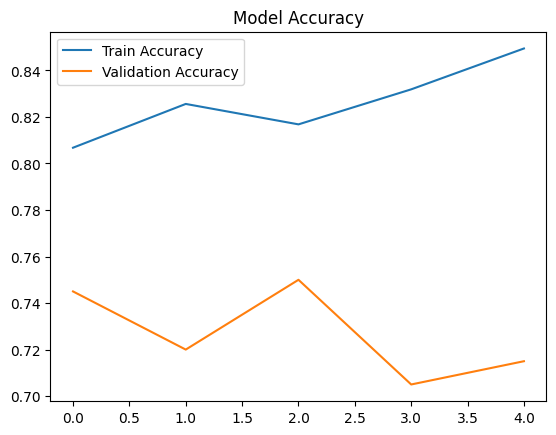

In [12]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Confusion Matrix
y_pred = model.predict(X_test_padded).argmax(axis=1)
cm = confusion_matrix(y_test_mapped, y_pred, labels=list(sentiment_mapping.values()))
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=sentiment_mapping.keys())
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# Training history visualization
history = model.fit(X_train_padded, y_train_mapped, validation_data=(X_test_padded, y_test_mapped), epochs=5, batch_size=32)  # Replace ... with your training and validation data
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')
plt.show()


In [18]:
from sklearn.utils.class_weight import compute_class_weight

class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train_mapped),
    y=y_train_mapped
)

class_weights = {i: weight for i, weight in enumerate(class_weights)}
model.fit(X_train_padded, y_train_mapped, validation_data=(X_test_padded, y_test_mapped), epochs=5, batch_size=32, class_weight=class_weights)


Epoch 1/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 7s 223ms/step - accuracy: 0.8200 - loss: 0.8632 - val_accuracy: 0.1450 - val_loss: 1.4560
Epoch 2/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 189ms/step - accuracy: 0.6299 - loss: 0.8525 - val_accuracy: 0.7650 - val_loss: 0.9989
Epoch 3/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 192ms/step - accuracy: 0.7672 - loss: 0.9278 - val_accuracy: 0.7000 - val_loss: 1.2801
Epoch 4/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 187ms/step - accuracy: 0.8726 - loss: 0.7047 - val_accuracy: 0.7150 - val_loss: 1.4165
Epoch 5/5
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 188ms/step - accuracy: 0.5950 - loss: 0.8099 - val_accuracy: 0.7050 - val_loss: 1.4657


In [20]:
def test_sentiment_analysis():
    while True:
        user_input = input("Enter a review (or type 'exit' to stop): ").strip()
        if user_input.lower() == 'exit':
            break
        elif user_input == "":
            print("Please enter a valid review.")
            continue
        processed_input = preprocess_text(user_input)
        seq = tokenizer.texts_to_sequences([processed_input])
        padded_seq = pad_sequences(seq, maxlen=max_sequence_length, padding='post')
        prediction = model.predict(padded_seq).argmax(axis=1)[0]
        sentiment = list(sentiment_mapping.keys())[list(sentiment_mapping.values()).index(prediction)]
        print(f"Predicted Sentiment: {sentiment}\n")

test_sentiment_analysis()


Enter a review (or type 'exit' to stop): i love this prouct
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Predicted Sentiment: Positive

Enter a review (or type 'exit' to stop): exit


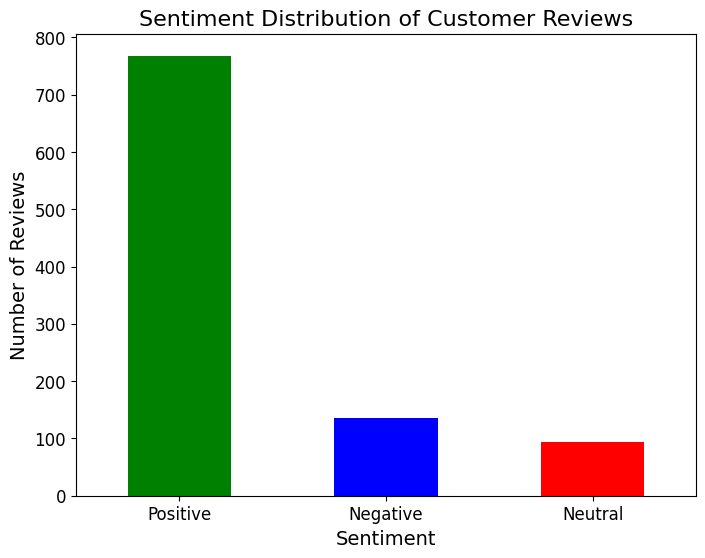

In [7]:
import matplotlib.pyplot as plt

sentiment_counts = data['sentiment'].value_counts()

plt.figure(figsize=(8, 6))
sentiment_counts.plot(kind='bar', color=['green', 'blue', 'red'])
plt.title("Sentiment Distribution of Customer Reviews", fontsize=16)
plt.xlabel("Sentiment", fontsize=14)
plt.ylabel("Number of Reviews", fontsize=14)
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.show()
